In [30]:
import cv2
import numpy as np
from tensorflow import keras
from keras.optimizers import Adam
from keras.utils import np_utils

#from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D

In [2]:
CLASS_MAP = {
    "paper": 0,
    "rock": 1,
    "scissor": 2,
}



def mapper(val):
    return CLASS_MAP[val]

In [4]:
IMG_SAVE_PATH='image_data'
os.listdir(IMG_SAVE_PATH)

['paper', 'rock', 'scissor']

In [5]:
# creating dataset from training data images and their labels (labels=their folder name)
dataset = []

for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    if not os.path.isdir(path):
        continue
    for item in os.listdir(path):
        img = cv2.imread(os.path.join(path, item))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (112, 112))
        dataset.append([img, directory])

In [6]:
type(dataset)

list

In [7]:
import random
random.shuffle(dataset)

In [8]:
data, labels = zip(*dataset)

In [9]:
X_train=np.array(data)

In [10]:
X_train=X_train.astype(float)

In [11]:
X_train=X_train/255

In [12]:
labels = list(map(mapper, labels))

In [13]:
y_train=np.array(labels)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#splitting data 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [16]:
def get_model():
    cnn = models.Sequential([
        
    # Convolution Layer Conv1
        
    layers.Conv2D(filters=64, kernel_size=(3, 3),input_shape=(112, 112, 3),activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #Convolution layer Conv2
        
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation ='relu'),
    layers.MaxPooling2D((2, 2)),
        
    #3
        
    layers.Conv2D(filters=256, kernel_size=(3, 3),activation ='relu'),
    layers.MaxPooling2D((2, 2)),
        
    #4
        
    layers.Conv2D(filters=512, kernel_size=(3, 3),activation ='relu'),
    layers.MaxPooling2D((2, 2)),
        
    
        
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
        
    layers.Dropout(0.5),
        
    layers.Dense(3, activation='sigmoid')
])
    return cnn

In [17]:
model = get_model()

In [18]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [21]:
model.fit(X_train,y_train ,epochs=10)

Epoch 1/10
61/61 [==============================] - 64s 1s/step - loss: 1.0827 - accuracy: 0.4255
Epoch 2/10
61/61 [==============================] - 69s 1s/step - loss: 0.8116 - accuracy: 0.6123
Epoch 3/10
61/61 [==============================] - 72s 1s/step - loss: 0.5536 - accuracy: 0.7774
Epoch 4/10
61/61 [==============================] - 71s 1s/step - loss: 0.3648 - accuracy: 0.8608
Epoch 5/10
61/61 [==============================] - 70s 1s/step - loss: 0.2321 - accuracy: 0.9193
Epoch 6/10
61/61 [==============================] - 71s 1s/step - loss: 0.2210 - accuracy: 0.9255
Epoch 7/10
61/61 [==============================] - 71s 1s/step - loss: 0.1533 - accuracy: 0.9508
Epoch 8/10
61/61 [==============================] - 72s 1s/step - loss: 0.1015 - accuracy: 0.9658
Epoch 9/10
61/61 [==============================] - 70s 1s/step - loss: 0.0806 - accuracy: 0.9720
Epoch 10/10
61/61 [==============================] - 71s 1s/step - loss: 0.0856 - accuracy: 0.9700


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_classes = [np.argmax(element) for element in y_test]


print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       107
           1       0.97      0.97      0.97       109
           2       0.97      0.90      0.93       125

    accuracy                           0.95       341
   macro avg       0.95      0.95      0.95       341
weighted avg       0.95      0.95      0.95       341



In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 512)       1

In [24]:
model.save("my_model_.5")

INFO:tensorflow:Assets written to: my_model_.5\assets


In [25]:
def plot_sample(index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_test[index])
    plt.xlabel(y_pred_classes[index])

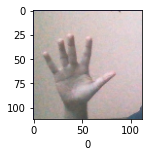

In [26]:
plot_sample(27)